<a href="https://colab.research.google.com/github/AhmadFirmanto/Portfolio-pyton/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

# data

In [14]:
data = pd.DataFrame(
    {'A' : [random.choice(range(60, 85)) for i in range(30)],
     'B' : [random.choice(range(65, 90)) for i in range(30)],
     'C' : [random.choice(range(55, 70)) for i in range(30)]}
)

data

,A,B,C
0,80,66,67
1,72,69,56
2,64,88,64
3,64,75,68
4,69,83,65
5,82,72,58
6,82,76,64
7,69,81,59
8,65,84,63
9,75,87,56


In [26]:
# variable

A = data_a
B = data_b
C = data_c

In [21]:
A

array([75, 84, 77, 84, 60, 62, 61, 62, 78, 71, 82, 82, 82, 67, 83, 73, 61,
       79, 68, 79, 66, 71, 61, 63, 73, 84, 65, 83, 67, 63])

# anova / statistik-F

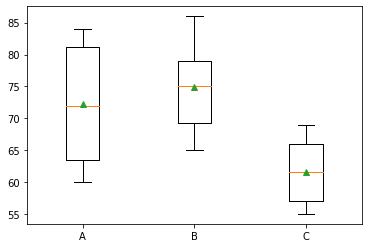

In [30]:
# distribusi data/ persebaran varian

plt.boxplot([A, B, C], labels=['A', 'B', 'C'], showmeans=True);

In [32]:
# uji anova

stats.f_oneway(A, B, C)

F_onewayResult(statistic=31.746959194349994, pvalue=4.436220901161473e-11)

In [35]:
# merubah data grup di satukan
# data sejenis 

data_baru = pd.melt(data, var_name='kualitatif', value_name='kuantitatif')
data_baru

,kualitatif,kuantitatif
0,A,80
1,A,72
2,A,64
3,A,64
4,A,69
...,...,...
85,C,69
86,C,58
87,C,57
88,C,62


In [37]:
# uji anova (R style)
# library

from statsmodels.formula.api import ols

In [38]:
# uji anova

F = ols(formula='kuantitatif ~ kualitatif', data=data_baru).fit()
print(F.summary())

                            OLS Regression Results                            
Dep. Variable:            kuantitatif   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     44.56
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.75e-14
Time:                        01:04:46   Log-Likelihood:                -298.21
No. Observations:                  90   AIC:                             602.4
Df Residuals:                      87   BIC:                             609.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          71.9667      1.235     

In [39]:
# uji anova lainya
# library

from statsmodels.stats.anova import anova_lm


In [42]:
# uji anova lainya

F_ = anova_lm(F)
F_

,df,sum_sq,mean_sq,F,PR(>F)
kualitatif,2.0,4076.155556,2038.077778,44.56065,4.745376e-14
Residual,87.0,3979.133333,45.737165,NaN,NaN
